# C2Score - part 2: Population statistics - DAILY

Let's move from individual trading systems data described in "Part 1" to sets of systems.

We will calculate statistics of daily returns for the whole population of trading systems.
Then, we can test hypotheses of daily returns of various sets of systems selected by some criteria.
Then, we can determine, if the given criteria selects systems having better stats than the stats of the population.

For example: If we select systems having Age > 180, can we conclude that returns of this setis statisticaly greater than return of the population?

Let's implement our cleaning rules as a view at first:

```
# -------------------------------------------------
# Returns data in intervals cleaned
# -------------------------------------------------
create or replace view ReturnsDataInIntervalsCleaned 
 (DateStart, Equity,
			 DateEnd007, Equity007, Return007, 
			 DateEnd014, Equity014, Return014, 
			 DateEnd021, Equity021, Return021,
			 DateEnd030, Equity030, Return030,
			 DateEnd060, Equity060, Return060,
			 DateEnd090, Equity090, Return090,
			 DateEnd120, Equity120, Return120,
			 DateEnd150, Equity150, Return150,
			 DateEnd180, Equity180, Return180)
 as 
    select DateStart, Equity,
			 DateEnd007, Equity007, if(isnull(Return007), -1, Return007) as Return007,
			 DateEnd014, Equity014, if(isnull(Return014), -1, Return014) as Return014,
			 DateEnd021, Equity021, if(isnull(Return021), -1, Return021) as Return021,
			 DateEnd030, Equity030, if(isnull(Return030), -1, Return030) as Return030,
			 DateEnd060, Equity060, if(isnull(Return060), -1, Return060) as Return060,
			 DateEnd090, Equity090, if(isnull(Return090), -1, Return090) as Return090,
			 DateEnd120, Equity120, if(isnull(Return120), -1, Return120) as Return120,
			 DateEnd150, Equity150, if(isnull(Return150), -1, Return150) as Return150,
			 DateEnd180, Equity180, if(isnull(Return180), -1, Return180) as Return180
	from SystemsReturnsInIntervals 
    where 
     Date(DateStart) >= '2017-06-01' 
	 and 
     (
		(Return007 is null or (Return007 is not null and (Return007 > -0.5 and Return007 < 0.5)))
		and
		(Return014 is null or Return014 is not null and (Return014 > -0.5 and Return014 < 0.5))
     );
```
 
 Next view is rolling daily statistics:

```
create or replace view ReturnsPopulationStatsDaily as 
select  
    Date(DateStart) as DateStart, count(*) as Observations,
    Date(DateEnd007) as DateEnd007, min(Return007) as minRet007, max(Return007) as maxRet007, avg(Return007) as avgRet007, std(Return007) as stdRet007,
    Date(DateEnd014) as DateEnd014, min(Return014) as minRet014, max(Return014) as maxRet014, avg(Return014) as avgRet014, std(Return014) as stdRet014,
    Date(DateEnd021) as DateEnd021, min(Return021) as minRet021, max(Return021) as maxRet021, avg(Return021) as avgRet021, std(Return021) as stdRet021,
    Date(DateEnd030) as DateEnd030, min(Return030) as minRet030, max(Return030) as maxRet030, avg(Return030) as avgRet030, std(Return030) as stdRet030,
    Date(DateEnd060) as DateEnd060, min(Return060) as minRet060, max(Return060) as maxRet060, avg(Return060) as avgRet060, std(Return060) as stdRet060,
    Date(DateEnd090) as DateEnd090, min(Return090) as minRet090, max(Return090) as maxRet090, avg(Return090) as avgRet090, std(Return090) as stdRet090,
    Date(DateEnd120) as DateEnd120, min(Return120) as minRet120, max(Return120) as maxRet120, avg(Return120) as avgRet120, std(Return120) as stdRet120,
    Date(DateEnd150) as DateEnd150, min(Return150) as minRet150, max(Return150) as maxRet150, avg(Return150) as avgRet150, std(Return150) as stdRet150,
    Date(DateEnd180) as DateEnd180, min(Return180) as minRet180, max(Return180) as maxRet180, avg(Return180) as avgRet180, std(Return180) as stdRet180 
	from  ReturnsDataInIntervalsCleaned 
	group by DateStart;
```

And finally, the whole population statistics:

```
create or replace view ReturnsPopulationStats as 
select  
    count(*) as Observations,
    min(Return007) as minRet007, max(Return007) as maxRet007, avg(Return007) as avgRet007, std(Return007) as stdRet007,
    min(Return014) as minRet014, max(Return014) as maxRet014, avg(Return014) as avgRet014, std(Return014) as stdRet014,
    min(Return021) as minRet021, max(Return021) as maxRet021, avg(Return021) as avgRet021, std(Return021) as stdRet021,
    min(Return030) as minRet030, max(Return030) as maxRet030, avg(Return030) as avgRet030, std(Return030) as stdRet030,
    min(Return060) as minRet060, max(Return060) as maxRet060, avg(Return060) as avgRet060, std(Return060) as stdRet060,
    min(Return090) as minRet090, max(Return090) as maxRet090, avg(Return090) as avgRet090, std(Return090) as stdRet090,
    min(Return120) as minRet120, max(Return120) as maxRet120, avg(Return120) as avgRet120, std(Return120) as stdRet120,
    min(Return150) as minRet150, max(Return150) as maxRet150, avg(Return150) as avgRet150, std(Return150) as stdRet150,
    min(Return180) as minRet180, max(Return180) as maxRet180, avg(Return180) as avgRet180, std(Return180) as stdRet180 
	from  ReturnsDataInIntervalsCleaned;
 
```

In [3]:
# Let's see what we have. A few rows in 2020:
source("JupyterUtils.R")
statsDaily = getC2ScoreDbData("select * from ReturnsPopulationStatsDaily where datestart >= '2020-01-01'")
options(digits=3)
# Show a few rows, just first 12 columns
head(statsDaily[,1:12])

,DateStart,Observations,DateEnd007,minRet007,maxRet007,avgRet007,stdRet007,DateEnd014,minRet014,maxRet014,avgRet014,stdRet014
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-01,540,2020-01-08,-1,0.420,-0.0439,0.228,2020-01-15,-1,0.257,-0.0822,0.295
2,2020-01-02,544,2020-01-09,-1,0.400,-0.0395,0.207,2020-01-16,-1,0.313,-0.0769,0.286
3,2020-01-03,548,2020-01-10,-1,0.323,-0.0415,0.215,2020-01-17,-1,0.313,-0.0802,0.293
4,2020-01-04,543,2020-01-11,-1,0.323,-0.0325,0.195,2020-01-18,-1,0.313,-0.0824,0.298
5,2020-01-05,542,2020-01-12,-1,0.493,-0.0262,0.183,2020-01-19,-1,0.350,-0.0721,0.286
6,2020-01-06,546,2020-01-13,-1,0.251,-0.0314,0.190,2020-01-20,-1,0.398,-0.0714,0.281


We see daily statistics of systems 7 and 14 days returns stored in the database.

What do we have calculated for every day? 

We have data about returns between the given date and after 7 days: 
- "Observations" is a number of systems on the given date.
- "DateEnd007" is a date 7 days after DateStart.
- "minRet007" is a minimum of systems returns. The value -1 means -100%. It means some systems died within those 7 days.
- "maxRet007" is a maximum of systems returns within 7 days.
- "avgRet007" is an average of 7 days systems returns. 
- "stdRet007" is a standard deviation of 7 days returns.

Similarly for 14 days.

We have day-by-day returns statistics in time intervals defined in the ReturnsPopulationStatsDaily view. See above.

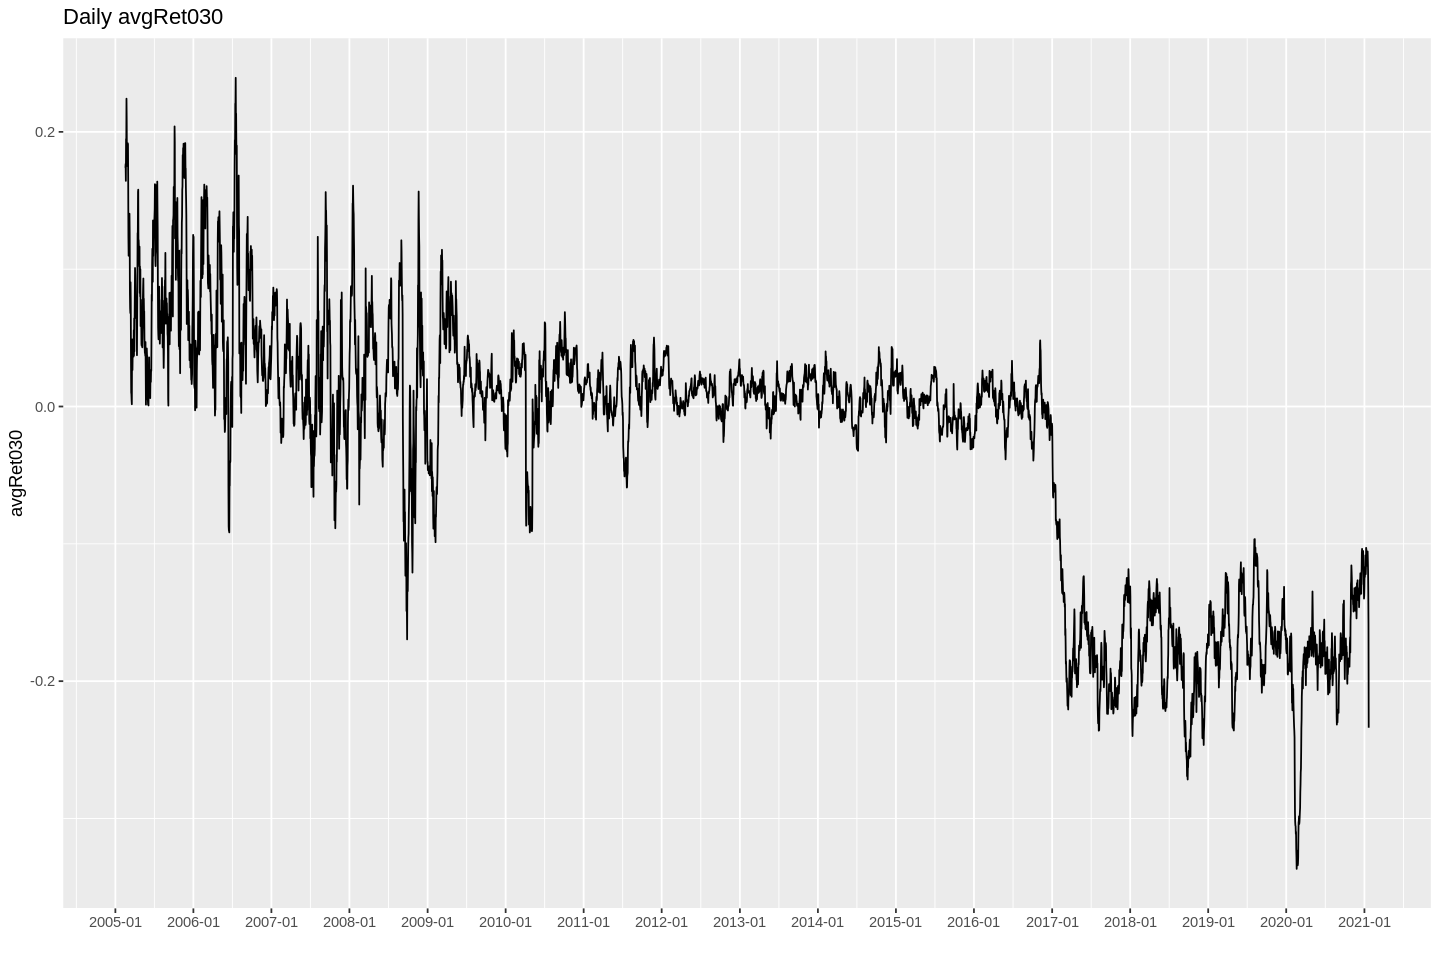

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.337  -0.103   0.004  -0.030   0.024   0.239 

Number of observations = 5818  SD =  0.0953 


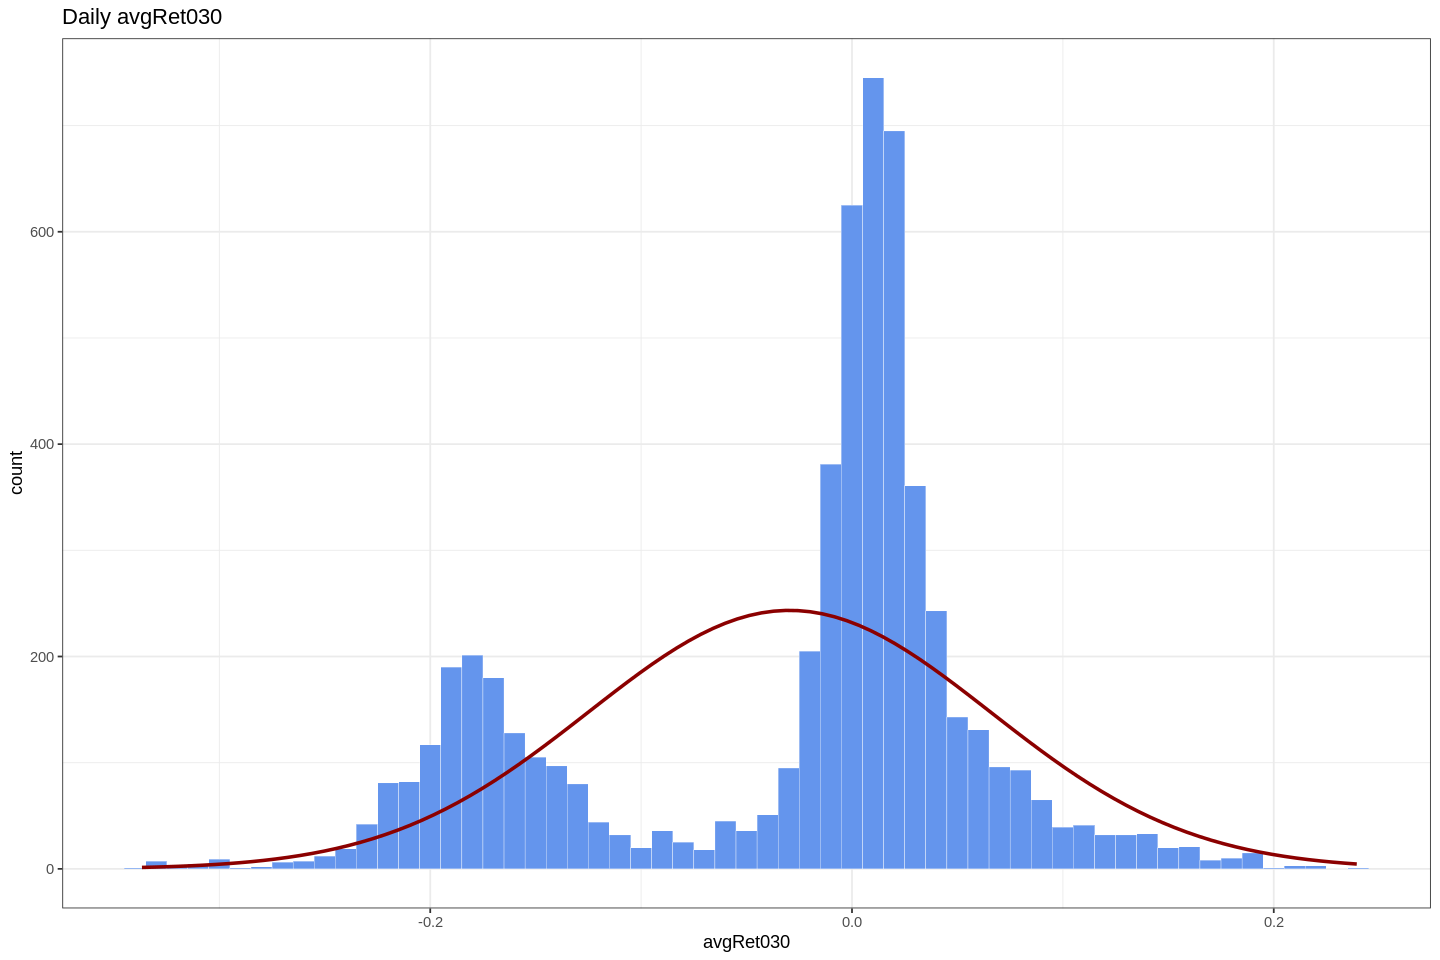

In [5]:
# Let's visualise 30-days returns as an example.

# 30 days returns are not defined in the last 30 database rows. We need to omit them.
sql = "select adddate(Date(max(datetime)), INTERVAL -30 Day) as MaxDate from c2ex_equity_daily;"
MaxDate = getC2ScoreDbData(sql)$MaxDate

sql = str_interp("select * from ReturnsPopulationStatsDaily where DateStart < '${MaxDate}'")

statsDaily = getC2ScoreDbData(sql)

observations = statsDaily$avgRet030

populationCharts("avgRet030",statsDaily)

summary(observations)
cat("Number of observations =",nrow(statsDaily)," SD = ",sd(observations),"\n")